In [1]:
# Comment the following cell if running through the command :
# papermill runnable_HPO.ipynb executed_HPO.ipynb -f params_for_HPO.yaml --kernel jupyter.jax_env

In [2]:
global_seed = 88
save_results = False
# Parameters specfific to the benchmark
benchmark_settings = {"benchmark_name" : "pMNIST_via_avalanche",
                      "difficulty" : "standard",
                      "num_tasks" : 3,
                      "train_percentage" : 0.3,
                      "num_val_benchmarks" : 1,
                      "batch_size" : 128}

# Parameters specific to the method
method_settings = {"method_name" : "EWC",
                   "grow_from" : "output",
                   "hessian_percentile" : 95,
                   "grad_percentile" : 95,
                   "num_inputs" : 28*28,
                   "num_hidden_root" : 1000,
                   "num_outputs" : 10,
                   "loss_name" : "CE",
                   "optimizer_name" : "Adam"}

# Parameters specific to HPO
HPO_settings = {"HPO_name" : "greedy_HPO",
                "n_trials" : 3,
                #"lr" : (5e-5, 2e-3),
                "num_epochs" : (1, 3),
                "ewc_lambda" : (100,400)
                #"lwf_alpha" : None, #(0.1, 0.9),
                #"lwf_temperature" : None} #(1, 3)
                }

# Parameters specific to the visualization
visualization_settings = {"savefig" : False,
                          "visualize_accs_matrix" : True,
                          "visualize_avg_acc_curve" : True,
                          "visualize_best_params" : True,
                          "visualize_val_accs_matrix" : True,
                          "visualize_accuracy_through_benchmarks" : True}

In [3]:
import sys
import os
import numpy as np
import warnings
warnings.filterwarnings('ignore')

sys.path.append("Methods/" + method_settings["method_name"])
sys.path.append("HPO_lib")
sys.path.append("HPO_lib/benchmark_loaders")


path = os.path.dirname(os.path.abspath("__file__"))
data_path = path + "/data"

## Imports

In [4]:
from HPO_lib.abstract_torch import get_device
from HPO_lib.get_benchmarks import get_benchmarks
from HPO_lib.run_HPO import run_HPO
from HPO_lib.validation import validate
from HPO_lib.visualize import visualize_HPO, visualize_validation
from HPO_lib.save_and_load_results import save

In [5]:
device = get_device(1)

## Get benchmarks

In [6]:
benchmarks_list = get_benchmarks(benchmark_settings, global_seed)

## Run HPO

In [7]:
test_accs_matrix, best_params_list = run_HPO(HPO_settings, method_settings, benchmark_settings, benchmarks_list[0], device, global_seed)

[I 2024-07-19 11:11:34,586] A new study created in memory with name: Search number 1



--------------------------------------------------
LEARNING TASK 1
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-19 11:11:34 +0200
-- >> Start of training phase << --
100%|██████████| 141/141 [00:02<00:00, 64.70it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.5405
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8341
100%|██████████| 141/141 [00:02<00:00, 70.12it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1523
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9544
-- >> End of training phase << --


[I 2024-07-19 11:11:41,687] Trial 0 finished with value: 61.07790273556231 and parameters: {'num_epochs': 2, 'ewc_lambda': 252}. Best is trial 0 with value: 61.07790273556231.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-19 11:11:41 +0200
-- >> Start of training phase << --
100%|██████████| 141/141 [00:02<00:00, 65.80it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7073
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7945
100%|██████████| 141/141 [00:02<00:00, 70.19it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1574
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9527
-- >> End of training phase << --


[I 2024-07-19 11:11:48,692] Trial 1 finished with value: 75.5366869300912 and parameters: {'num_epochs': 2, 'ewc_lambda': 369}. Best is trial 1 with value: 75.5366869300912.


[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-19 11:11:48 +0200
-- >> Start of training phase << --
100%|██████████| 141/141 [00:01<00:00, 70.60it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.6348
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.8114
100%|██████████| 141/141 [00:02<00:00, 70.38it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1580
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9508
100%|██████████| 141/141 [00:02<00:00, 70.28it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1050
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9678
-- >> End of training phase << --


[I 2024-07-19 11:11:57,563] Trial 2 finished with value: 85.46528875379938 and parameters: {'num_epochs': 3, 'ewc_lambda': 315}. Best is trial 2 with value: 85.46528875379938.


-- >> Start of training phase << --
100%|██████████| 141/141 [00:02<00:00, 70.31it/s]
Epoch 0 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.7265
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.7897
100%|██████████| 141/141 [00:02<00:00, 70.12it/s]
Epoch 1 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1702
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9462
100%|██████████| 141/141 [00:02<00:00, 70.03it/s]
Epoch 2 ended.
	Loss_Epoch/train_phase/train_stream/Task000 = 0.1020
	Top1_Acc_Epoch/train_phase/train_stream/Task000 = 0.9693
-- >> End of training phase << --


[I 2024-07-19 11:12:06,052] A new study created in memory with name: Search number 2
[W 2024-07-19 11:12:06,057] Trial 0 failed with parameters: {'num_epochs': 2, 'ewc_lambda': 252} because of the following error: Exception('Parameter fc3.weight expected but not found in the optimizer').
Traceback (most recent call last):
  File "/home/mathis/miniconda3/envs/.jax_env/lib/python3.12/site-packages/optuna/study/_optimize.py", line 196, in _run_trial
    value_or_values = func(trial)
                      ^^^^^^^^^^^
  File "/home/mathis/Master-Thesis-1/Workspace/Core work/HPO_lib/HPOs/greedy_HPO.py", line 54, in objective
    output = train(model_copy, method_settings, params_copy, HPs, train_loader, device, global_seed)
             ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/home/mathis/Master-Thesis-1/Workspace/Core work/Methods/EWC/lib/method.py", line 65, in train
    ewc.train(experience)
  File "/home/mathis/miniconda3/envs/.jax_


--------------------------------------------------
LEARNING TASK 2
[InteractiveLogger] Resuming from checkpoint. Current time is 2024-07-19 11:12:06 +0200
-- >> Start of training phase << --


Exception: Parameter fc3.weight expected but not found in the optimizer

In [ ]:
def f1 () :
    global L
    L = [4,5,6]

def f2 () :
    global L
    L = [1,2,3]
    f1()
    return L
f2()

[4, 5, 6]

## Visualize results

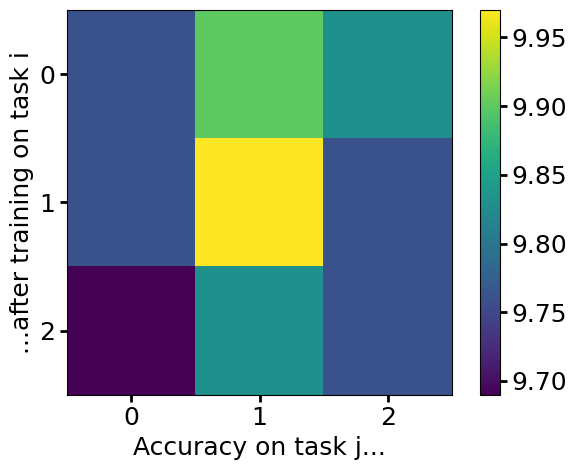

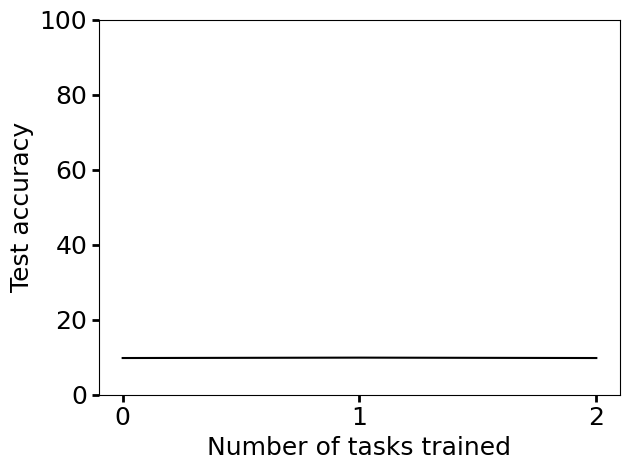

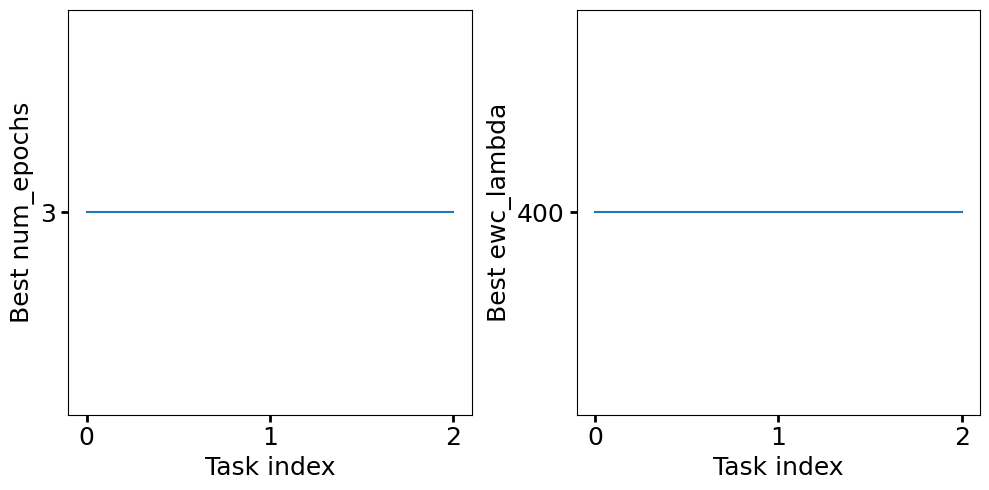

In [ ]:
visualize_HPO(test_accs_matrix, best_params_list, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Validate

In [ ]:
val_accs_matrix = validate(HPO_settings, benchmarks_list, benchmark_settings, method_settings, best_params_list, device, global_seed)


BENCHMARK 0

--------------------------------------------------
LEARNING TASK 1


KeyError: 'ewc'

## Visualize validation

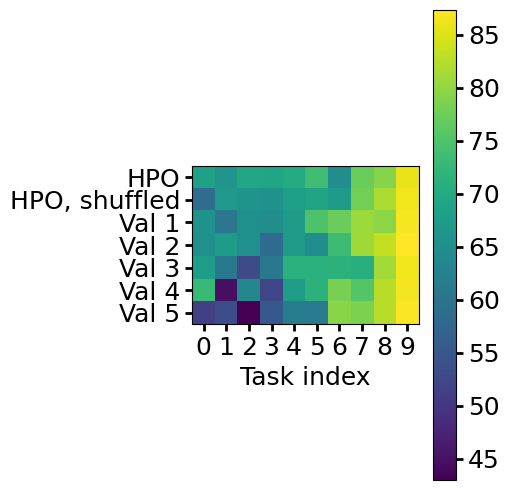

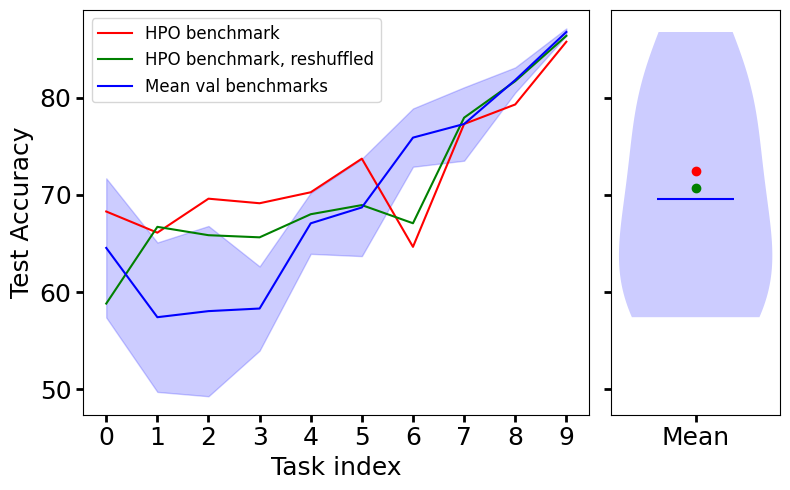

In [ ]:
visualize_validation(val_accs_matrix, test_accs_matrix, visualization_settings, HPO_settings, method_settings, benchmark_settings)

## Save results matrices

In [ ]:
save(test_accs_matrix, best_params_list, val_accs_matrix, HPO_settings, method_settings, benchmark_settings, save_results)